# MagLim Chain Plots

In [1]:
import numpy as np
import matplotlib
import getdist
from getdist import plots

In [2]:
# GENERAL PLOT OPTIONS
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['xtick.bottom'] = True
matplotlib.rcParams['xtick.top'] = False
matplotlib.rcParams['ytick.right'] = False
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['axes.linewidth'] = '1.0'
matplotlib.rcParams['axes.labelsize'] = 'large'
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['grid.linewidth'] = '0.0'
matplotlib.rcParams['grid.alpha'] = '0.18'
matplotlib.rcParams['grid.color'] = 'lightgray'
matplotlib.rcParams['legend.labelspacing'] = 0.77
matplotlib.rcParams['savefig.bbox'] = 'tight'
matplotlib.rcParams['savefig.format'] = 'pdf'
matplotlib.rcParams['font.size'] = 25

In [3]:
# Loading Chains
analysis_settings = {u'ignore_rows':0.5}
codes = [100] + list(range(1, 7))
labels_list = [
    r'DES-Y3 3x2pt ($\Lambda$CDM)',
    r'DES-Y3 3x2pt ($\xi < 0$, $w = -0.999$)',
    r'DES-Y3 3x2pt ($\xi > 0$, $w = -1.001$)',
    r'DES-Y3 3x2pt ($w > -1$)',
    r'DES-Y3 3x2pt ($w < -1$)',
    r'DES-Y3 3x2pt ($\xi < 0$, $w > -1$)',
    r'DES-Y3 3x2pt ($\xi > 0$, $w < -1$)',
]
chains = {}
labels = {}
for code, label in zip(codes, labels_list):
    chain = getdist.loadMCSamples('./chains/maglim_new/MCMC{:d}'.format(code), settings=analysis_settings)
    chain.addDerived(chain['sigma8'] * np.sqrt(chain['omegam']/0.3), name='S8', label='S_8')
    chains[code] = chain
    labels[code] = label

./chains/maglim_new/MCMC1.4.txt
./chains/maglim_new/MCMC1.1.txt
./chains/maglim_new/MCMC1.2.txt
./chains/maglim_new/MCMC1.3.txt
Removed 0.5 as burn in
./chains/maglim_new/MCMC2.4.txt
./chains/maglim_new/MCMC2.2.txt
./chains/maglim_new/MCMC2.3.txt
./chains/maglim_new/MCMC2.1.txt
Removed 0.5 as burn in
./chains/maglim_new/MCMC3.3.txt
./chains/maglim_new/MCMC3.1.txt
./chains/maglim_new/MCMC3.4.txt
./chains/maglim_new/MCMC3.2.txt
Removed 0.5 as burn in
./chains/maglim_new/MCMC4.2.txt
./chains/maglim_new/MCMC4.3.txt
./chains/maglim_new/MCMC4.4.txt
./chains/maglim_new/MCMC4.1.txt
Removed 0.5 as burn in
./chains/maglim_new/MCMC5.1.txt
./chains/maglim_new/MCMC5.3.txt
./chains/maglim_new/MCMC5.4.txt
./chains/maglim_new/MCMC5.2.txt
Removed 0.5 as burn in
./chains/maglim_new/MCMC6.2.txt
./chains/maglim_new/MCMC6.1.txt
./chains/maglim_new/MCMC6.3.txt
./chains/maglim_new/MCMC6.4.txt
Removed 0.5 as burn in


<Figure size 1000x1000 with 0 Axes>

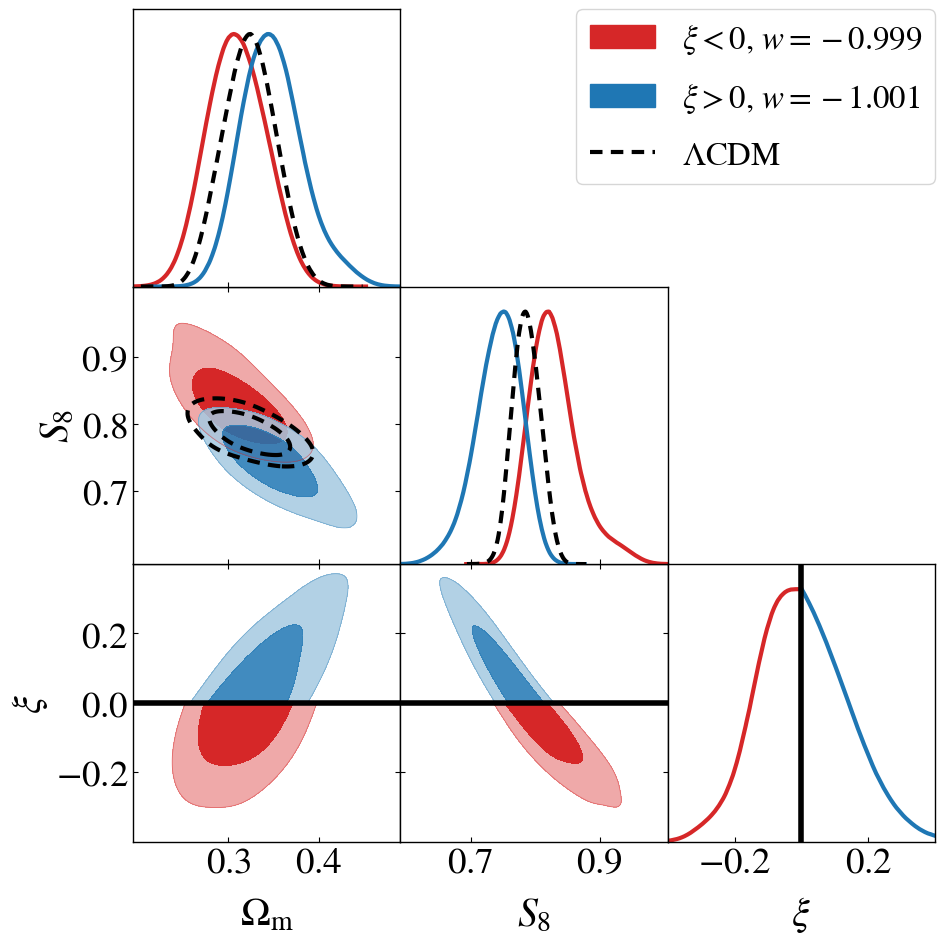

In [7]:
# Lambda-CDM
plot = plots.get_single_plotter(width_inch=10, ratio=1)
plot.settings.rc_sizes(axes_fontsize=27, lab_fontsize=29, legend_fontsize=24)
plot.triangle_plot([chains[1], chains[2], chains[100]],
    ['omegam', 'S8', 'xi_interaction'],
    filled=[True, True, False],
    contour_ls=['-', '-', '--'],
    contour_colors=['tab:red', 'tab:blue', 'black'],
    contour_lws=3,
    legend_labels=[labels[1][14:-1], labels[2][14:-1], labels[100][14:-1]],
    legend_loc='upper right',
    param_limits={'xi_interaction': [-0.4, 0.4]},
)
plot.subplots[2, 1].axhline(0, color='black', ls='-', lw=4)
plot.subplots[2, 0].axhline(0, color='black', ls='-', lw=4)
plot.subplots[2, 2].axvline(0, color='black', ls='-', lw=4)
plot.export('Figures/DESY3_3x2_MagLim_Interacting.pdf')

<Figure size 1000x1000 with 0 Axes>

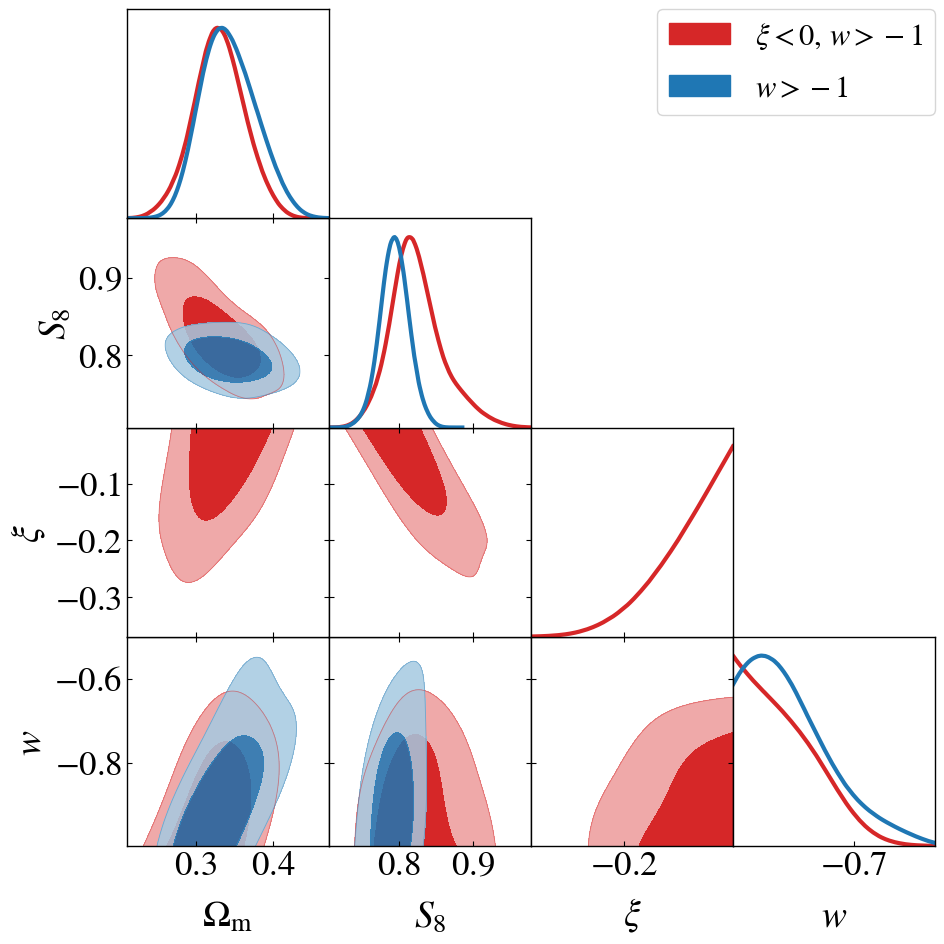

In [11]:
# wCDM, w > -1
plot = plots.get_single_plotter(width_inch=10, ratio=1)
plot.settings.rc_sizes(axes_fontsize=27, lab_fontsize=29, legend_fontsize=24)
plot.triangle_plot([chains[5], chains[3]],
    ['omegam', 'S8', 'xi_interaction', 'w'],
    filled=True,
    contour_colors=['tab:red', 'tab:blue'],
    contour_lws=3,
    legend_labels=[labels[5][14:-1], labels[3][14:-1]],
    legend_loc='upper right',
    #param_limits={"xi_interaction":[-1, 1]}
)
plot.export('Figures/DESY3_3x2_MagLim_Interacting_wCDM_xineg.pdf')

<Figure size 1000x1000 with 0 Axes>

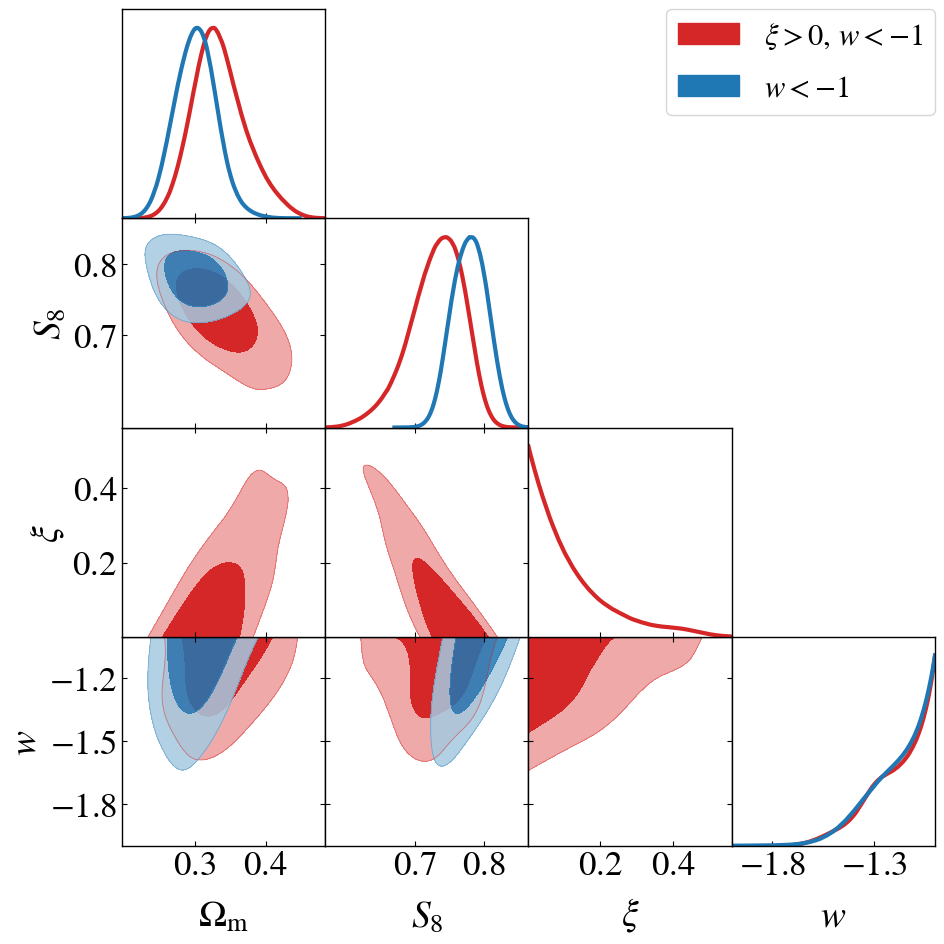

In [13]:
# wCDM, w < -1
plot = plots.get_single_plotter(width_inch=10, ratio=1)
plot.settings.rc_sizes(axes_fontsize=27, lab_fontsize=29, legend_fontsize=24)
plot.triangle_plot([chains[6], chains[4]],
    ['omegam', 'S8', 'xi_interaction', 'w'],
    filled=True,
    contour_colors=['tab:red', 'tab:blue'],
    contour_lws=3,
    legend_labels=[labels[6][14:-1], labels[4][14:-1]],
    legend_loc='upper right',
    #param_limits={"xi_interaction":[-1, 1]}
)
plot.export('Figures/DESY3_3x2_MagLim_Interacting_wCDM_xipos.pdf')